# Creating a Space for Image Observations

In this exercise we will create a space to represent Image observation. Image-based observations are very important in Reinforcement Learning since they allow the agent to learn from pixels and require a very limited feature engineering or feature extraction phase, in this way the agent can focus on what is important for its task without being limited from the heuristics decided manually from the user. We will create a space representing RGB images with dimensions equal to 256x256.

In [1]:
import gym
from gym import spaces

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np # used for the dtype of the space

We are dealing with 256x256 RGB images, so the space has a shape of (256, 256, 3). In addition, images range from 0 to 255 (if we consider uint8 images):

In [2]:
# since the Space is RGB images with shape 256x256 the final shape is (256, 256, 3)
shape = (256, 256, 3)

# If we consider uint8 images the bounds are 0-255
low = 0
high = 255

# Space type: unsigned int
dtype = np.uint8

We are now ready to create the space. An Image is a Box space since it has defined bounds:

In [3]:
# create the space
space = spaces.Box(low=low, high=high, shape=shape, dtype=dtype)

# Print space representation
print("Space", space)

Space Box(256, 256, 3)


In [4]:
# Sample from the space
sample = space.sample()
print("Space Sample", sample)

Space Sample [[[237 248 247]
  [  7 226 243]
  [166  44 119]
  ...
  [ 98 119  60]
  [228 129  91]
  [103  58  44]]

 [[ 40 137 175]
  [ 56  68 139]
  [189 134 195]
  ...
  [ 35 225 210]
  [  3 210 205]
  [ 91  60  77]]

 [[207 172  15]
  [161  83  12]
  [ 23 232 227]
  ...
  [107 198 105]
  [123  93  13]
  [203 179 172]]

 ...

 [[ 88  53  93]
  [ 18  15  18]
  [192  37 177]
  ...
  [ 36 237 192]
  [150 158  49]
  [201 198 168]]

 [[161  49  62]
  [ 70 185 161]
  [138 244 222]
  ...
  [ 38  68 185]
  [ 79  90 232]
  [121 221 169]]

 [[ 50 100 111]
  [177 159 142]
  [137  17 131]
  ...
  [128  97  59]
  [243 125  63]
  [ 29 253  17]]]


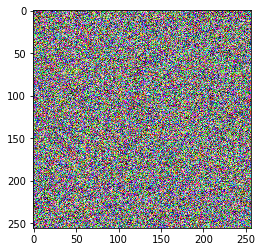

In [5]:
plt.imshow(sample)

Now let’s suppose we want to give our agent the possibility to see the last n=4 frames. This is a very useful techniques to let the agent understands its movement. Adding the temporal component, we obtain a state representation composed of 4 dimensions, the first dimension is the temporal one, the second is the width, the third is the height and the last one is the channels.

In [6]:
# we want a space representing the last n=4 frames
n_frames = 4  # number of frames
width = 256  # image width
height = 256  # image height
channels = 3  # number of channels (RGB)
shape_temporal = (n_frames, width, height, channels)
# create a new instance of space
space = spaces.Box(low=low, high=high, shape=shape_temporal, dtype=dtype)